In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset = pd.read_csv("C:\\Users\\dhars\\Downloads\\Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


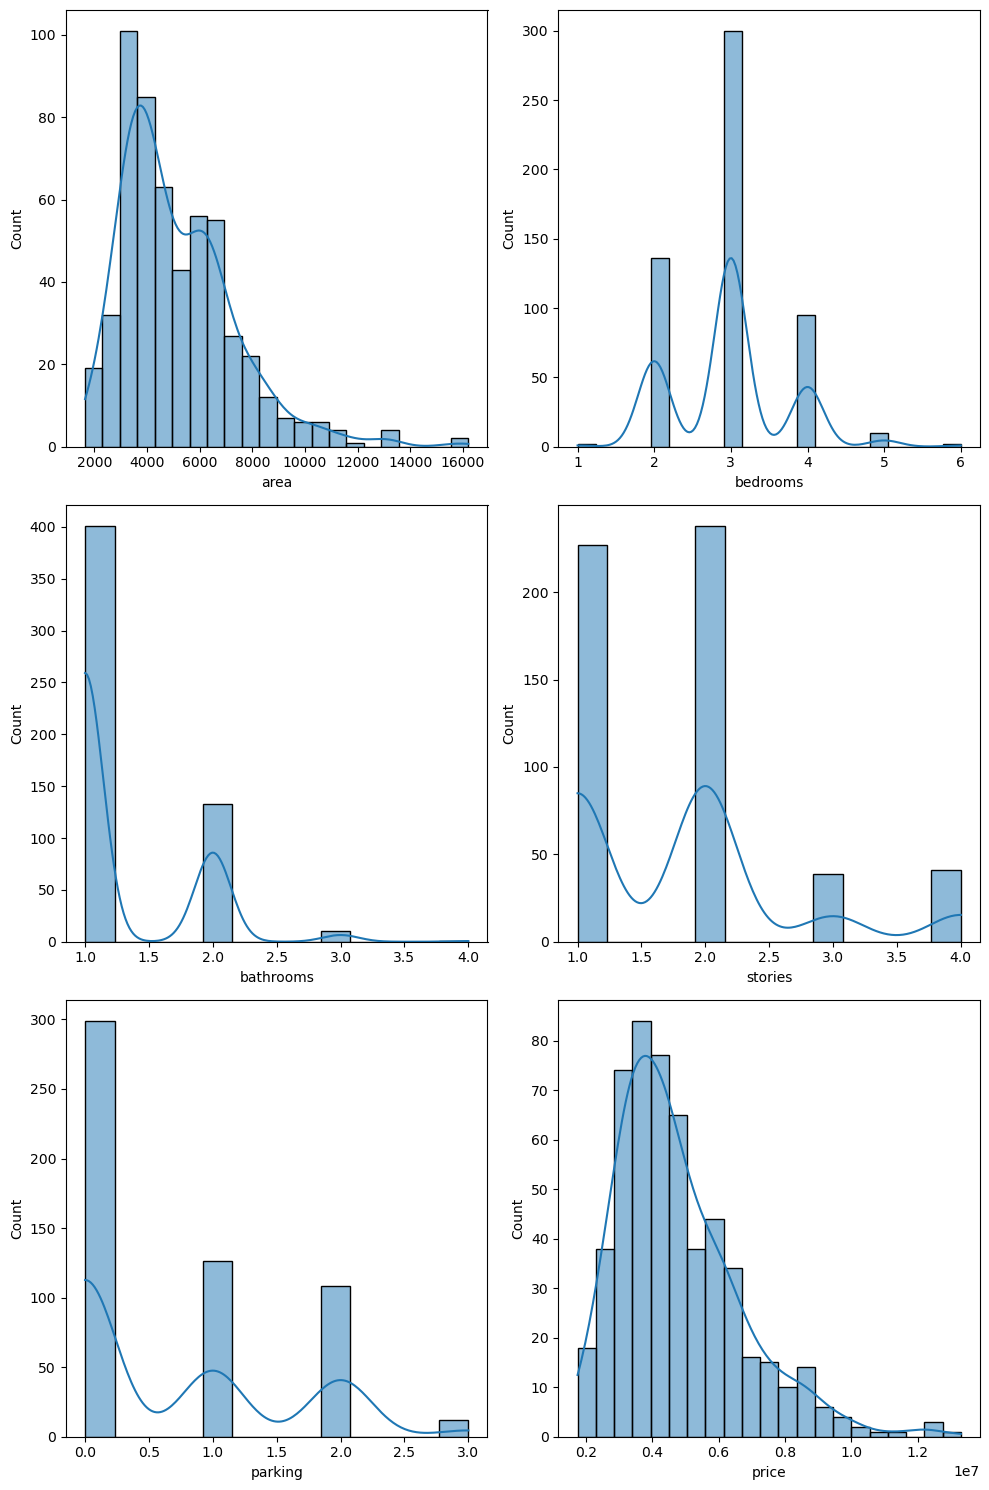

In [26]:
# univariate analysis for continuous variables - ['area','bedrooms','bathrooms','stories','parking','price']
univar_data = dataset[['area','bedrooms','bathrooms','stories','parking','price']]
cols = 2
rows = 3
num_cols = univar_data
fig = plt.figure(figsize=(10, 15))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = dataset[col], ax = ax,kde=True)
fig.tight_layout()  
plt.show()

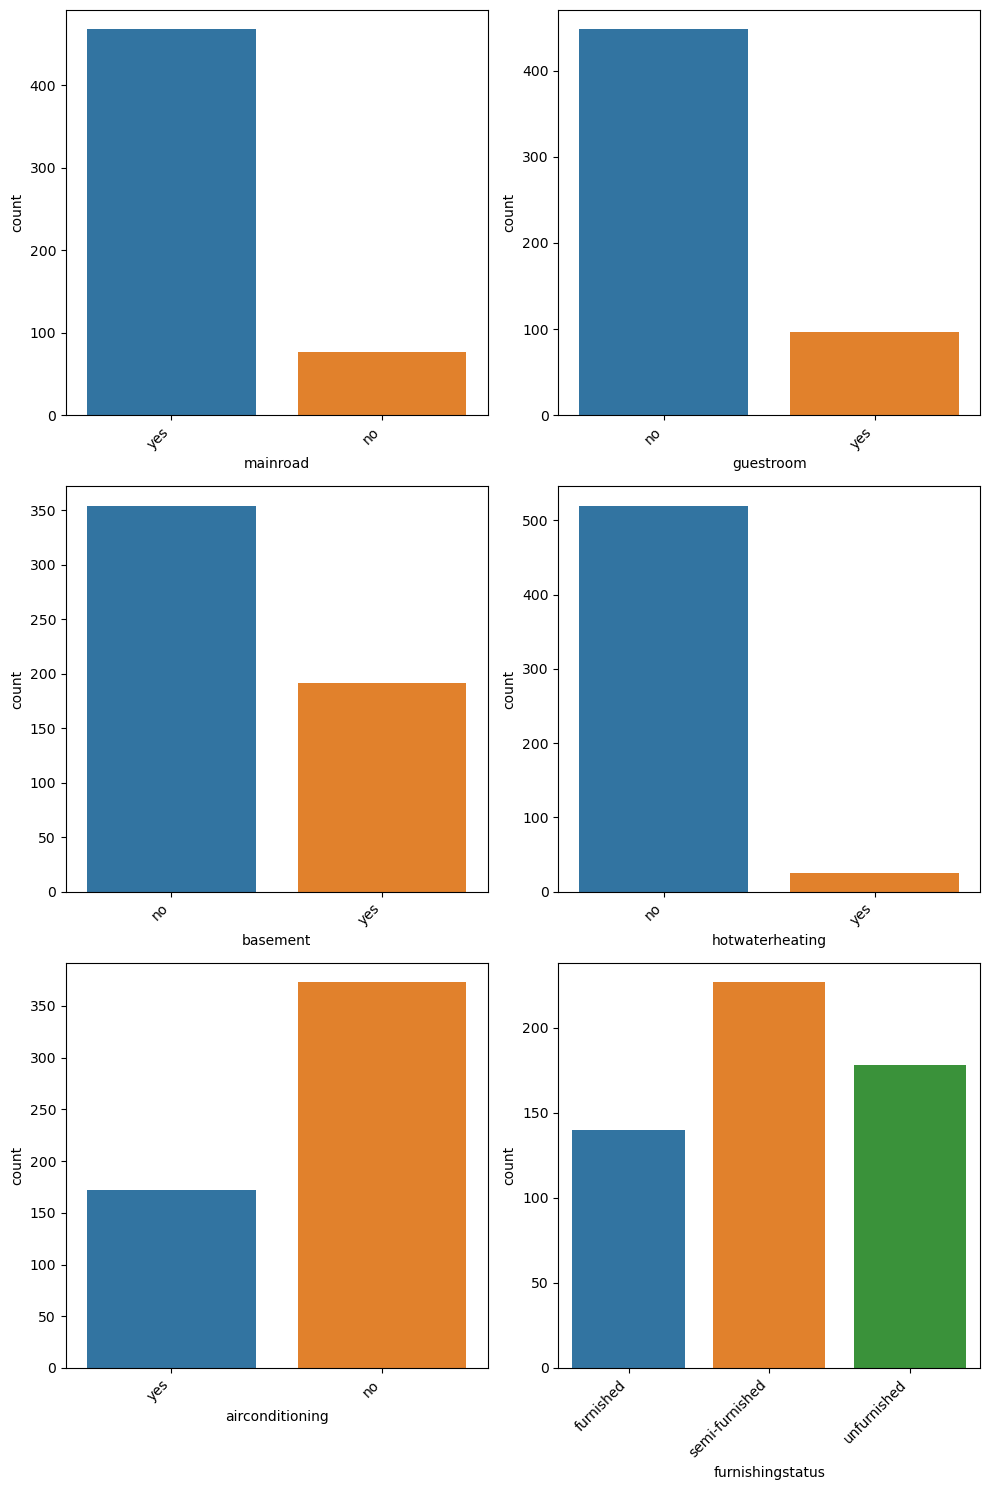

In [28]:
# univariate analysis for categorical variables - ['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']
univar_categorical = dataset[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']]
cols = 2
rows = 3
fig = plt.figure(figsize= (10,15))
cat_cols = univar_categorical
for i, col in enumerate(cat_cols):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=dataset[col], ax = ax)
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

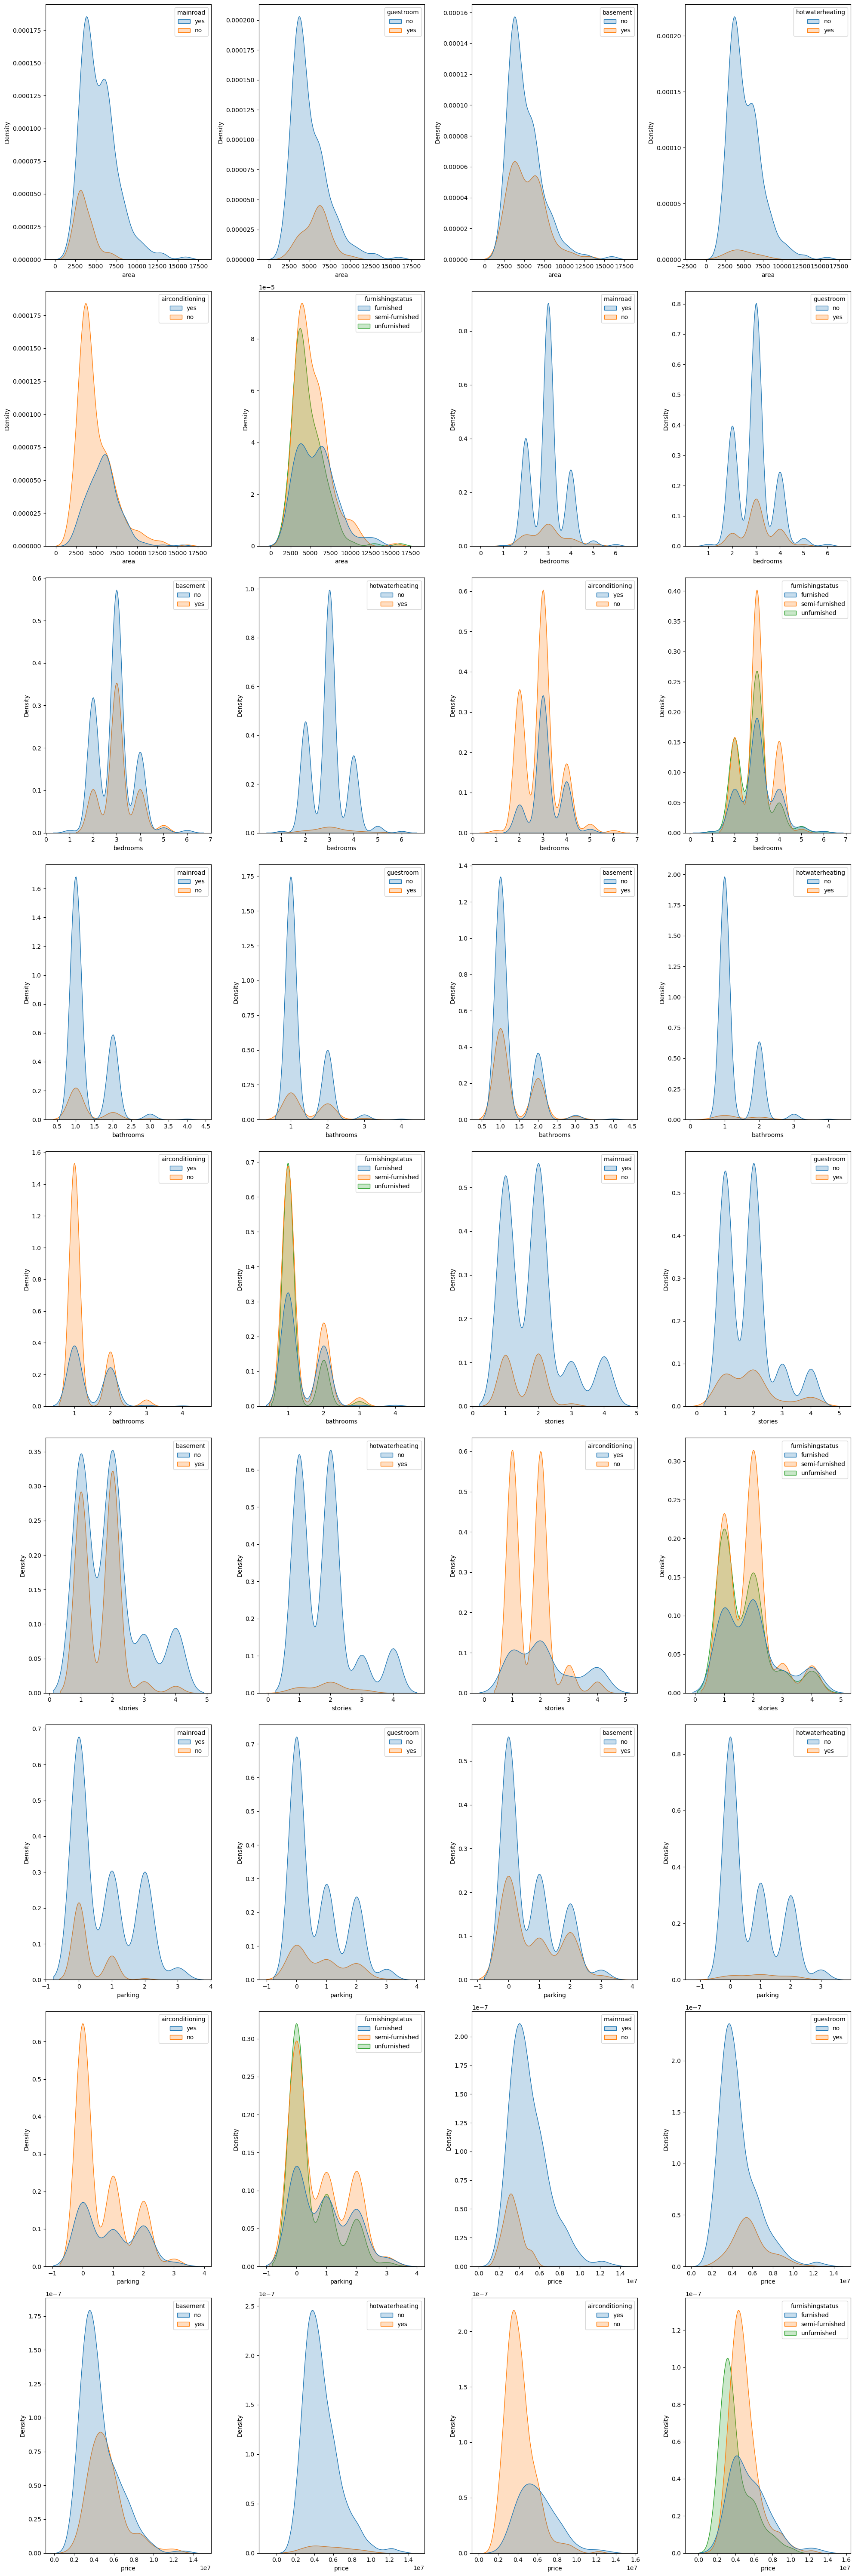

In [44]:
# Bivariate Analysis of Categorical Variables vs Continuous Variables:
cont = dataset[['area','bedrooms','bathrooms','stories','parking','price']]
cat = dataset[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']]
rows = 9
cols = 4
fig = plt.figure(figsize= (20,60))
k=0
for i in cont:
    for j in cat:
        ax = fig.add_subplot(rows, cols, k+1)
        sns.kdeplot(data=dataset,x=cont[i],hue=cat[j],fill=True)
        k = k + 1
fig.tight_layout()  
plt.show()
        

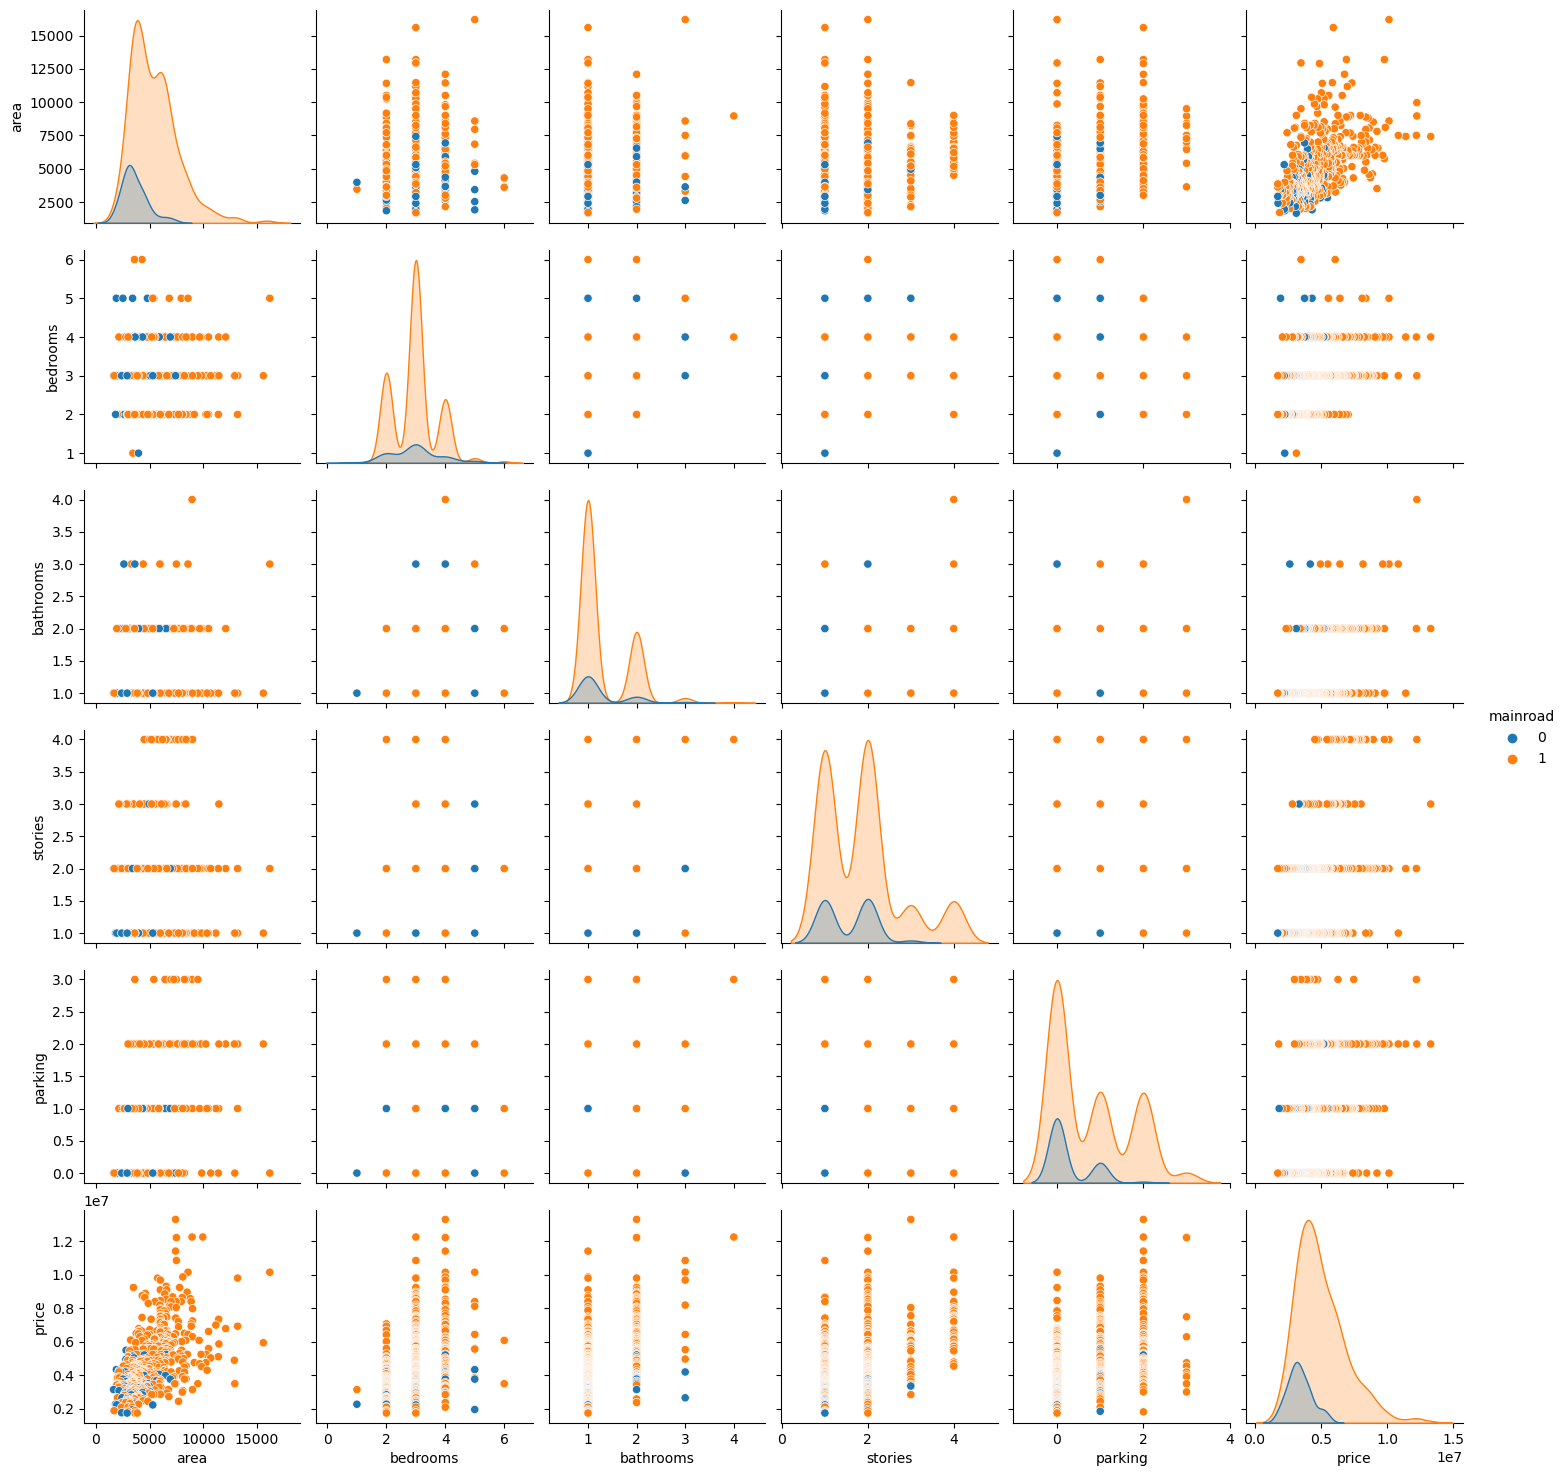

In [50]:
# Multivariate Analysis with "mainroad" column with other continuous columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["mainroad"] = le.fit_transform(dataset["mainroad"])
sns.pairplot(data=dataset[['area','bedrooms','bathrooms','stories','parking','price','mainroad']],hue='mainroad')

In [51]:
# 4. Perform descriptive statistics on the dataset.
dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,3.000000


In [58]:
# 5. Check for Missing values and deal with them.
# For continuous data
df_cont = dataset[['area','bedrooms','bathrooms','stories','parking','price','mainroad']]
column_means = df_cont.mean()
df_filled = df_cont.fillna(column_means)
df_filled

,area,bedrooms,bathrooms,stories,parking,price,mainroad
0,7420,4,2,3,2,13300000,1
1,8960,4,4,4,3,12250000,1
2,9960,3,2,2,2,12250000,1
3,7500,4,2,2,3,12215000,1
4,7420,4,1,2,2,11410000,1
...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000,1
541,2400,3,1,1,0,1767150,0
542,3620,2,1,1,0,1750000,1
543,2910,3,1,1,0,1750000,0


In [60]:
# For categorical data
df_cat = dataset[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']]
col_mode = df_cat.mode()
df_fill = df_cat.fillna(col_mode)
df_fill

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,1,no,no,no,yes,furnished
1,1,no,no,no,yes,furnished
2,1,no,yes,no,no,semi-furnished
3,1,no,yes,no,yes,furnished
4,1,yes,yes,no,yes,furnished
...,...,...,...,...,...,...
540,1,no,yes,no,no,unfurnished
541,0,no,no,no,no,semi-furnished
542,1,no,no,no,no,unfurnished
543,0,no,no,no,no,furnished


In [64]:
# Handled all missing values
dataset[['area','bedrooms','bathrooms','stories','parking','price','mainroad']] = df_filled
dataset[['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']] = df_fill
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,furnished


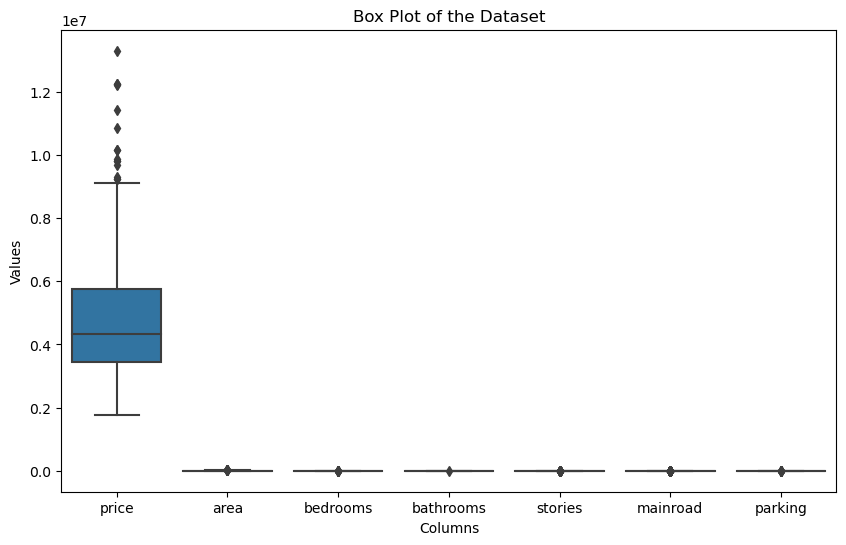

In [69]:
# Box Plot to find the outliers

df = pd.DataFrame(dataset)
# Plot box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of the Dataset')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Answer: No outliers found in the given continuous independent features !.  

In [72]:
# 7. Encoding for categorical data
le = LabelEncoder()
df_cat_cols = dataset[['guestroom','basement','hotwaterheating','airconditioning','furnishingstatus']]
for i in df_cat_cols:
    dataset[i] = le.fit_transform(dataset[i])
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [113]:
# 8. Split the data into dependent and independent variables.
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']]
y = dataset['price']
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
0,7420,4,2,3,2,1,0,0,0,1,0
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,0
4,7420,4,1,2,2,1,1,1,0,1,0


In [114]:
# 9. Scale the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)
X

array([[ 1.04672629,  1.40341936,  1.42181174, ..., -0.2192645 ,
         1.4726183 , -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.2192645 ,
         1.4726183 , -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ..., -0.2192645 ,
        -0.67906259, -0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.2192645 ,
        -0.67906259,  1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.2192645 ,
        -0.67906259, -1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.2192645 ,
        -0.67906259,  1.22296203]])

In [115]:
# 10. Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[-0.70592066, -1.30886273, -0.57018671, ..., -0.2192645 ,
        -0.67906259,  1.22296203],
       [-0.53065597, -1.30886273, -0.57018671, ..., -0.2192645 ,
        -0.67906259,  1.22296203],
       [-0.97342993, -1.30886273, -0.57018671, ..., -0.2192645 ,
        -0.67906259,  1.22296203],
       ...,
       [ 0.27648408,  0.04727831,  1.42181174, ..., -0.2192645 ,
         1.4726183 ,  1.22296203],
       [-0.71514512,  0.04727831, -0.57018671, ..., -0.2192645 ,
        -0.67906259,  1.22296203],
       [ 0.66852353,  0.04727831, -0.57018671, ..., -0.2192645 ,
        -0.67906259, -1.40628573]])

In [116]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 4130485.81157511,  5951629.29605473,  4493296.54353272,
        7780433.96281394,  2889973.78705373,  7363347.86089152,
        3305453.7124039 ,  3183735.32926522,  2870669.15110932,
        8667784.23517628,  6855584.77571023,  3912231.71957891,
        3950706.37799032,  4967222.32060846,  4227263.05053569,
        1957043.8694037 ,  4234806.79975857,  3783048.83430772,
        3322342.80946077,  4762611.34903236,  6301684.24187683,
        6686567.8521852 ,  4803173.15534444,  2725565.83775742,
        4981094.7749616 ,  6002154.03323216,  4931557.20886866,
        5653505.15565481,  5918906.1869429 ,  5484328.31840539,
        3394692.78101427,  5613665.83642399,  6823856.64204787,
        3021889.46603104,  4469536.60652045,  5255330.89824818,
        5225810.41766367,  3832135.90379033,  3054328.68223337,
        4099284.65283762,  8393400.53933588,  5198130.87753675,
        6667121.71334808,  3817227.46104522,  3210941.01557783,
        6544628.01013035,  4746442.99347

In [122]:
# Make predictions on new data
new_data = np.array([[3000, 3, 2, 2, 1, 1, 0, 1, 0, 1, 'Semi-furnished']])
new_data_df = pd.DataFrame(new_data, columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus'])
new_data_encoded = pd.get_dummies(new_data_df)
predicted_price = model.predict(new_data_encoded)
print("Predicted Price:", predicted_price)

Predicted Price: [7590111.92276143]


C:\Users\dhars\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [123]:
# Measuring the performance of the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1027871168993.623
R-squared: 0.6432883263853563
